In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from covid19model.data.sciensano import get_serological_data
from covid19model.visualization.output import *

In [2]:
# first inspect the syntax of the raw data

herzog_raw = pd.read_csv("../../data/raw/sero/serology_covid19_belgium_round_1_to_7_v20210406.csv", parse_dates=['collection_start', 'collection_end'])
sciensano_raw = pd.read_csv("../../data/raw/sero/Belgium COVID-19 Studies - Sciensano_Blood Donors_Tijdreeks.csv")

In [6]:
# Note that this raw data is NOT used, rather the interim data is used, which is a copy of Table S1 in the work by Herzog et al. 2021
sciensano_raw

,Date,Lower CI,Upper CI,Seroprevalence
0,18 Mar 2020,NaN,NaN,NaN
1,30 Mar 2020,0.006,0.035,0.020
2,16 Apr 2020,0.035,0.066,0.053
3,29 Apr 2020,0.034,0.067,0.050
4,13 May 2020,0.036,0.072,0.053
5,27 May 2020,0.038,0.074,0.055
6,10 Jun 2020,0.030,0.061,0.045
7,24 Jun 2020,0.043,0.078,0.059
8,7 Jul 2020,0.040,0.078,0.058
9,23 Jul 2020,0.035,0.069,0.052


In [2]:
df_sero_herzog, df_sero_sciensano = get_serological_data()

In [65]:
dates1 = df_sero_herzog.index.values
values1 = df_sero_herzog['rel', 'mean'].values
lower1 = df_sero_herzog['rel', 'LL'].values
upper1 = df_sero_herzog['rel', 'UL'].values

dates2 = df_sero_sciensano.index.values
values2 = df_sero_sciensano['rel', 'mean'].values
lower2 = df_sero_sciensano['rel', 'LL'].values
upper2 = df_sero_sciensano['rel', 'UL'].values

# Plot with nice colorframe

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'subsy' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


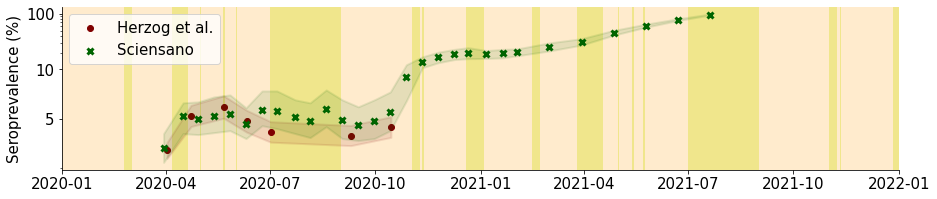

In [94]:

fig, ax = plt.subplots(figsize=(15, 3))

start_date = pd.Timestamp(2020, 1, 1)
end_date = pd.Timestamp(2022, 1, 1)

# Add mobility time series
ax.scatter(dates1, values1, color='maroon', zorder=4, label='Herzog et al.') # ambulatory patients (from doctor)
ax.fill_between(dates1, upper1, lower1, color='maroon', linewidth=2, zorder=4, alpha=0.1)
ax.scatter(dates2, values2, color='darkgreen', zorder=4, label='Sciensano', marker='x')
ax.fill_between(dates2, upper2, lower2, linewidth=2, color='darkgreen', zorder=4, alpha=0.1) # Red Cross donors

# Add background colouring
week_color='blanchedalmond'#'white'
weekend_color='blanchedalmond'#'lightgrey'
vacation_color='khaki'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

ax.set_xlim(start_date, end_date)
plt.yscale('symlog', linthreshy=0.1, subsy=[2, 3, 4, 5, 6, 7, 8, 9], linscaley=1.618)
ax.set_yticks([0.05, 0.1, 1])
ax.set_yticklabels([5, 10, 100])

ax.set_ylabel('Seroprevalence (%)')

ax.legend(loc=2)

ax.grid(False)

# plt.savefig('seroprevalence-data_timeline.png', dpi=400, bbox_inches='tight')